## Cross Valdiation : the right way

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
# See Chapter 4-0 for a descrition of this dataset
path = './data/'
df = pd.read_csv(path + 'Data_HousePrice_cleaned.csv') 
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg     Other        Other   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner        Other   
4          60       RL         84.0    14260      IR1     Other        Other   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd Exterior1st  \
0     2Story            7            5       2003          2003     VinylSd   
1     1Story            6            8       1976          1976     MetalSd   
2     2Story            7            5       2001          2002     VinylSd   
3     2Story            7            5       1915          1970     Wd Sdng   
4     2Story            8            5       2000          2000     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3       Other       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706           0        150          856   
1           Gd          ALQ         978           0        284         1262   
2           Mn          GLQ         486           0        434          920   
3           No          ALQ         216           0        540          756   
4           Av          GLQ         655           0        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        Ex       856       854             0       1710           1.0   
1        Ex      1262         0             0       1262           0.0   
2        Ex       920       866             0       1786           1.0   
3        Gd       961       756             0       1717           1.0   
4        Ex      1145      1053             0       2198           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         2         1             3             1          Gd   
1           1.0         2         0             3             1          TA   
2           0.0         2         1             3             1          Gd   
3           0.0         1         0             3             1          Gd   
4           0.0         2         1             4             1          Gd   

   TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0             8           0     Attchd       2003.0          RFn           2   
1             6           1     Attchd       1976.0          RFn           2   
2             6           1     Attchd       2001.0          RFn           2   
3             7           1     Detchd       1998.0          Unf           3   
4             9           1     Attchd       2000.0          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0  

A convenient way to randomly partition this dataset into separate test and
training datasets is to use the train_test_split function from scikit-learn's
model_selection submodule.

>**Model Selection : sklearn.model_selection**
>
>The selection process for the best machine learning models is largely an iterative process where data scientists search >for the best model and the best hyper-parameters. Scikit-learn offers us many useful utilities that are helpful in both >training, testing and model selection phases. In this module, there exists utilities like KFold, train_test_split(), >GridSearchCV and RandomizedSearchCV. 

In [3]:
cat_feat = list(df.dtypes[df.dtypes == 'object'].index)
numerical_feat = list(df.dtypes[df.dtypes != 'object'].index)

cat_dataset = df[cat_feat].copy()
num_dataset = df[numerical_feat].copy()
df_numerical = pd.DataFrame(num_dataset, columns=numerical_feat)

cat_dummies = pd.get_dummies(cat_dataset)
df = pd.concat([df_numerical, cat_dummies], axis = 1)

In [4]:
df.head(5)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  MSZoning_FV  MSZoning_Other  MSZoning_RL  MSZoning_RM  \
0     208500            0               0            1            0   
1     181500            0               0            1            0   
2     223500            0               0            1            0   
3     140000            0               0            1            0   
4     250000            0               0            1            0   

   LotShape_IR1  LotShape_Other  LotShape_Reg  LotConfig_Corner  \
0             0               0             1                 0   
1             0               0             1                 0   
2             1               0             0                 0   
3             1               0             0                 1   
4             1               0             0                 0   

   LotConfig_Inside  LotConfig_Other  Neighborhood_CollgCr  \
0                 1                0                     1   
1                 0                1                     0   
2                 1                0                     1   
3                 0                0                     0   
4                 0                1                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert 

In [5]:
from sklearn.model_selection import train_test_split

cols = list(df.columns)
cols.remove('SalePrice')
X = df[cols].copy()
y = df['SalePrice'].copy()

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

print("X_train & y_train shape:", X_train.shape, y_train.shape)
print("X_test & y_test shape:", X_test.shape, y_test.shape)

X_train & y_train shape: (1536, 110) (1536,)
X_test & y_test shape: (659, 110) (659,)


In [6]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          70         60.0     9600            5            7       1910   
1          80        120.0    19296            6            5       1962   
2          20         72.0     8872            5            8       1965   
3          50         60.0     7200            6            5       1954   
4          20        107.0    11362            8            5       2004   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2002         0.0           0           0        264          264   
1          1962       399.0         672         690          0         1362   
2          2008       300.0         595           0        317          912   
3          1954         0.0         673           0        181          854   
4          2005        42.0        1039           0        797         1836   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       768       664             0       1432           0.0           0.0   
1      1382         0             0       1382           1.0           0.0   
2       912         0             0        912           1.0           0.0   
3       854       424             0       1278           0.0           0.0   
4      1836         0             0       1836           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             7           0   
1         1         0             3             1             6           1   
2         1         0             2             1             5           0   
3         1         0             4             1             6           0   
4         2         0             3             1             7           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1910.0           2         360         270            0   
1       1991.0           2         884           0            0   
2       1992.0           2         576           0          240   
3       1954.0           1         240           0            0   
4       2004.0           3         862         125          185   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            112          0            0         0        0       5    2007   
1            252          0            0         0        0       5    2009   
2              0          0            0         0        0      12    2008   
3              0          0            0         0        0       4    2008   
4              0          0            0         0        0       3    2009   

   MSZoning_FV  MSZoning_Other  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
0            0               0            0            1             0   
1            0               0            1            0             0   
2            0               0            1            0             0   
3            0               0            1            0             0   
4            0               0            1            0             1   

   LotShape_Other  LotShape_Reg  LotConfig_Corner  LotConfig_Inside  \
0               0             1                 0                 1   
1               0             1                 1                 0   
2               0             1                 1                 0   
3               0             1                 0                 1   
4               0             0                 0                 1   

   LotConfig_Other  Neighborhood_CollgCr  Neighborhood_Edwards  \
0                0                     0                     0   
1                0                     0                     0   
2                0                     0                     0   
3                0                     0                     0   
4                0                     0       

In [7]:
if 'SalePrice' in numerical_feat:
    numerical_feat.remove('SalePrice')
categorical_features = [feat for feat in list(X_train.columns) if feat not in numerical_feat]
#categorical_features

In [8]:
#df_train.head()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
#from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

### This can also create dummies: Wonderfull !!!!
### see https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
scaler_column = ColumnTransformer(transformers=[('scaler', StandardScaler(), numerical_feat)], 
                                  remainder='passthrough')
base_estimator = KernelRidge()

pipe = Pipeline(steps = [('scaler_pipe', scaler_column), ('model', base_estimator)])

In [9]:
from sklearn.model_selection import GridSearchCV

### Here you can define parameters for the pre-processing and cross validate it, wonderfull!!!!
params = [
  {'model__alpha': [1, 5, 10, 20, 100, 1000], 'model__kernel': ['linear']},
  {'model__alpha': [1, 5, 10, 20, 100, 1000], 'model__kernel': ['poly'], "model__degree" : [2,3]},
  {'model__alpha': [1, 5, 10, 20, 100, 1000], 'model__gamma': [0.01, 0.1, 0.5], 'model__kernel': ['rbf']},
    ]


In [10]:
#pipe[1].fit(pipe[0].fit_transform(X_train))

In [11]:
gd = GridSearchCV(
    pipe,  ## model to fit
    params, # grid of hyperparameter
    cv = 5,  # if integer assume k-fold, could assign any type of splitting method (see sklearn.model_selection)
    scoring = "neg_mean_squared_error", # scoring method to evaluate a model (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
    n_jobs = 4,
    verbose = 3, 
    refit = True
)

In [12]:
gd.fit(X_train, y_train) ## number of fits (6+ (6*2) + (6*3)) * 5

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler_pipe',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                    

In [13]:
result = pd.DataFrame(gd.cv_results_)

In [14]:
result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.084478      0.016477         0.007382        0.000899   
1       0.060763      0.003793         0.007329        0.000658   
2       0.062975      0.006043         0.006751        0.000554   
3       0.064879      0.003421         0.007848        0.001003   
4       0.078524      0.006137         0.009054        0.000105   

  param_model__alpha param_model__kernel param_model__degree  \
0                  1              linear                 NaN   
1                  5              linear                 NaN   
2                 10              linear                 NaN   
3                 20              linear                 NaN   
4                100              linear                 NaN   

  param_model__gamma                                            params  \
0                NaN    {'model__alpha': 1, 'model__kernel': 'linear'}   
1                NaN    {'model__alpha': 5, 'model__kernel': 'linear'}   
2                NaN   {'model__alpha': 10, 'model__kernel': 'linear'}   
3                NaN   {'model__alpha': 20, 'model__kernel': 'linear'}   
4                NaN  {'model__alpha': 100, 'model__kernel': 'linear'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0      -5.750178e+08      -6.407688e+08      -6.203507e+08      -6.128473e+08   
1      -5.665161e+08      -6.348180e+08      -6.246166e+08      -6.097947e+08   
2      -5.643996e+08      -6.309159e+08      -6.328983e+08      -6.093424e+08   
3      -5.688628e+08      -6.293956e+08      -6.526118e+08      -6.135223e+08   
4      -6.590271e+08      -6.789172e+08      -8.070661e+08      -6.958418e+08   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0      -4.966964e+08    -5.891362e+08    5.088602e+07                8  
1      -4.953720e+08    -5.862235e+08    5.105573e+07                6  
2      -4.963173e+08    -5.867747e+08    5.151371e+07                7  
3      -5.034948e+08    -5.935775e+08    5.270956e+07               10  
4      -6.221504e+08    -6.926005e+08    6.227439e+07               12

In [15]:
best_params = result.sort_values("rank_test_score")["params"][0]

In [16]:
best_params

{'model__alpha': 1, 'model__kernel': 'linear'}

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def plot_result(y_prediction, Y_true):
    fig , ax = plt.subplots(1,1,figsize=(10,5))
    ax.scatter(y_prediction, Y_true)
    ax.plot([0,600000],[0,600000], "--", c='red', label = "$Y_{pred} = Y_{true}$")
    ax.set_xlabel("$Y_{pred}$", fontsize = 12)
    ax.set_ylabel("$Y_{true}$", fontsize = 12)
    plt.legend()
    plt.show()
    print("mean_absolute_error:", mean_absolute_error(y_prediction, Y_true))
    print("mean_squared_error:", mean_squared_error(y_prediction, Y_true))
    print("mean_absolute_percentage_error:", mean_absolute_percentage_error(y_prediction, Y_true))

TEST RESULT


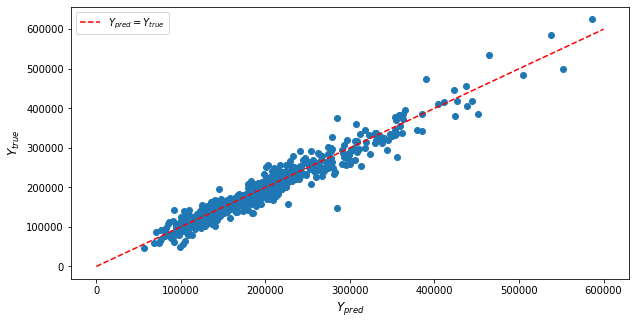

mean_absolute_error: 13873.933328163741
mean_squared_error: 376893235.4500312
mean_absolute_percentage_error: 0.07728469774259912
TRAIN RESULT


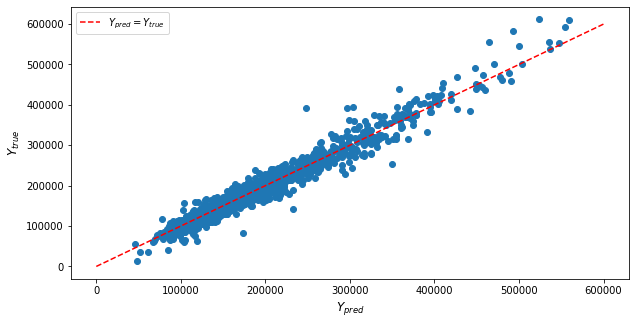

mean_absolute_error: 11828.56326488567
mean_squared_error: 297131826.8446222
mean_absolute_percentage_error: 0.06643489190188288


In [23]:
best_model = gd.best_estimator_

y_pred_test = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

print("TEST RESULT")
plot_result(y_pred_test, y_test)

print("TRAIN RESULT")
plot_result(y_pred_train, y_train)

In [1]:
#best_model

## Model Performance and Cross-Validation 

One of the key steps in building a machine learning model is to estimate its
performance on data that the model hasn't seen before. Let's assume that we fit our
model on a training dataset and use the same data to estimate how well it performs on
new data. 

We remember from that a model can suffer from
**underfitting (high bias)** if the model is too simple, or it can **overfit** the training data
**(high variance)** if the model is too complex for the underlying training data.
To find an acceptable *bias-variance tradeoff*, we need to evaluate our model
carefully. In this section, you will learn about the common **cross-validation**
techniques holdout cross-validation and k-fold cross-validation, which can help
us to obtain reliable estimates of the model's generalization performance, that is,
how well the model performs on unseen data.

### Holdout Method

Using the holdout method, we
split our initial dataset into separate training and test datasets—the former is used
for model training, and the latter is used to estimate its generalization performance.
However, in typical machine learning applications, we are also interested in tuning
and comparing different parameter settings to further improve the performance for
making predictions on unseen data. This process is called model selection, with
the name referring to a given classification problem for which we want to select
the optimal values of tuning parameters (also called hyperparameters). However, if
we reuse the same test dataset over and over again during model selection, it will
become part of our training data and thus the model will be more likely to overfit.

A better way of using the holdout method for model selection is to separate the
data into three parts: a training dataset, a validation dataset, and a test dataset.
The training dataset is used to fit the different models, and the performance on the
validation dataset is then used for the model selection. The advantage of having
a test dataset that the model hasn't seen before during the training and model
selection steps is that we can obtain a less biased estimate of its ability to generalize
to new data. The following figure illustrates the concept of holdout cross-validation,
where we use a validation dataset to repeatedly evaluate the performance of the
model after training using different hyperparameter values. Once we are satisfied
with the tuning of hyperparameter values, we estimate the model's generalization
performance on the test dataset:

![chapter-4-5_pic_0.png](./pic/chapter-4-5_pic_0.png)

### k-fold Cross-Validation

In k-fold cross-validation, we randomly split the training dataset into k folds without
replacement, where k – 1 folds are used for the model training, and one fold is used
for performance evaluation. This procedure is repeated k times so that we obtain k
models and performance estimates.

We then calculate the average performance of the models based on the different,
independent test folds to obtain a performance estimate that is less sensitive
to the sub-partitioning of the training data compared to the holdout method.
Typically, we use k-fold cross-validation for model tuning, that is, finding the
optimal hyperparameter values that yield a satisfying generalization performance,
which is estimated from evaluating the model performance on the test folds.
Once we have found satisfactory hyperparameter values, we can retrain the model
on the complete training dataset and obtain a final performance estimate using the
independent test dataset. The rationale behind fitting a model to the whole training
dataset after k-fold cross-validation is that providing more training examples to
a learning algorithm usually results in a more accurate and robust model.

![chapter-4-5_pic_1.png](./pic/chapter-4-5_pic_1.png)